#                                                주제 - 서울시 자동차 교통 사고량 예측 모델 
###    (날씨, 유류량, 인구, 자동차수 변수에 따른 서울시 일일 평균 교통 사고량 예측)


* Feature 값 설명

|     |    변수명           | 변수설명                    | 단위     | 특성       |
|-----|-------------------|-----------------------------|----------|------------|
| y   | accident/day      | 일 평균 교통사고수         | 수       | real       |
| x1  | taxi_driver       | 당월 일반택시 운전자수      | 명       | real       |
| x2  | gasolin           | 한 달 가솔린 소비량         | 1000배럴 | real       |
| x3  | diesel            | 한 달 디젤 소비량           | 1000배럴 | real       |
| x4  | LPG               | 한 달 LPG 소비량            | 1000배럴 | real       |
| x5  | temp              | 한 달 평균 기온             | 섭씨     | real       |
| x6  | temp_max          | 한 달 평균 최고기온         | 섭씨     | real       |
| x7  | temp_min          | 한 달 평균 최저기온         | 섭씨     | real       |
| x8  | temp_dif          | 한 달 평균 일교차           | 섭씨     | real       |
| x9  | rainfall          | 한 달 강수량               | mm       | real       |
| x10 | humidity          | 한 달 평균 습도             | %        | real       |
| x11 | humidity_min      | 한 달 평균 최저습도         | %        | real       |
| x12 | dew_point         | 한 달 평균 이슬점           | 섭씨     | real       |
| x13 | sun               | 한 달간 일조시간            | 시간     | real       |
| x14 | wind_spd_mean     | 한 달 평균 풍속             | m/s      | real       |
| x15 | wind_spd_max      | 한 달 평균 최고풍속         | m/s      | real       |
| x16 | rainfall_day      | 한 달간 강수일              | 일       | int (0~31) |
| x17 | frost             | 한 달간 서리 내린 날 수     | 일       | int (0~31) |
| x18 | fog               | 한 달간 안개낀 날 수        | 일       | int (0~31) |
| x19 | snow              | 한 달간 눈 온 날 수         | 일       | int (0~31) |
| x20 | yellow_sand       | 한 달간 황사 온 날 수       | 일       | int (0~31) |
| x21 | thunderbolts      | 한 달간 번개친 날 수        | 일       | int (0~31) |
| x22 | weather_condition | 한 달간 흐린 날 수          | 일       | int (0~31) |
| x23 | total_population  | 당월 인구수                 | 명       | int        |
| x24 | population(0~19)  | 당월 (0~19세) 인구         | 명        |  int      |
| x25 | population(20~59) | 당월 (20~59세) 인구        | 명        |  int      |
| x26 | population(60~)   | 당월 60세이상 인구수         | 명       | int        |
| x27 | total_vehicle     | 당월 자동차수               | 대       | int        |
| x28 | sedan             | 당월 승용차수               | 대       | int        |
| x29 | van               | 당월 승합차수               | 대       | int        |
| x30 | truck             | 당월 화물차수               | 대       | int        |
| x31 | special_car       | 당월 특수차수               | 대       | int        |
| x32 | bicycle           | 당월 2륜차수                | 대       | int        |

출처
1. 교통사고수 - 도로교통공단(http://taas.koroad.or.kr/web/shp/sbm/initStatsAnals.do?menuId=WEB_KMP_STA)
2. 택시운전자수 - 전국택시운송사업조합연합회(http://www.taxi.or.kr/04/01_view.php?no=95)
3. 기온 - 기상청 기상정보(http://www.kma.go.kr/weather/main.jsp) 
4. 유류량 - KOSIS(http://kosis.kr/statisticsList/statisticsList_01List.jsp?vwcd=MT_ZTITLE&parentId=I#SubCont)
5. 인구 - 서울 통계 DB 인구(http://stat.seoul.go.kr/jsp3/stat.db.jsp?cot=017&srl_dtl=10001)
6. 자동차 등록대수 - 국가지표체계(http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1257)

# * 예측치에 대한 고민
1. 당월데이터로는 당월 사고량을 예측할 수 없음(예측 시기의 문제)
2. 기존 데이터 y값들을 한칸 씩 내려서 전월 데이터로 당일 사고량을 예측하는 모델을 고안
3. 또 다른 방식으로 당월 데이터를 Row X 데이터들간의 관계로 예측하여서 예측용 데이터로 활용하는 방법도 생각해봄
4. y값 변경(기존 : 서울시 당월 전체 사고량 예측  > 변경 : 서울시 당월 일 평균 사고량 예측)
   - 한달이 각각 다른 일수를 가지기 때문에 days가 X feature값으로 들어가면 절대적인 영향력을 가짐


In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA

In [27]:
df1_sci = pd.read_excel('teamproject_data.xlsx', sheetname =2)
df11 = scale(df1_sci)
df1 = pd.DataFrame(data = df11, columns = df1_sci.columns)
print(df1)

    taxi_driver  gasolin/day  Diesel/day   LPG/day      temp  rainfall/day  \
0      0.261894    -0.681584    0.579235  2.176717 -1.412185     -0.573986   
1      0.274306     0.339946    0.437387  2.577366 -1.363129     -0.579949   
2      0.287282    -0.234997    0.736272  2.507881 -0.529186     -0.376452   
3      0.550181     0.859496    0.882186  1.963235  0.137969     -0.453483   
4      0.673168     0.466783    0.566148  2.389608  0.491168     -0.137447   
5      0.678246    -1.250097   -0.395706  2.109893  0.863990      0.259804   
6      0.622394    -1.021841   -0.101261  1.750935  1.217189      2.225867   
7      0.575004     0.828306    0.147382  2.442831  1.236811      0.700163   
8      0.638190     0.288148    0.084348  3.234273  0.913045     -0.111218   
9      0.813080    -1.872483    0.121209  2.342299  0.334190     -0.442478   
10     0.866112     0.485922    0.564403  1.657697 -0.499753     -0.560053   
11     1.195018     3.401499    0.965285  0.662826 -1.137474    

In [28]:
df3 = df1[['taxi_driver', 'gasolin/day', 'Diesel/day', 'LPG/day', 'temp', 'rainfall/day', 'humidity', 'dew_point', 'wind_spd_max', 'weather(5)', 'weather(weighted)', 'population(0~19)', 'population(20~59)', 'population(60~)', 'sedan', 'van', 'truck', 'special_car', 'bicycle', 'accident/day']]
print df3.head()

   taxi_driver  gasolin/day  Diesel/day   LPG/day      temp  rainfall/day  \
0     0.261894    -0.681584    0.579235  2.176717 -1.412185     -0.573986   
1     0.274306     0.339946    0.437387  2.577366 -1.363129     -0.579949   
2     0.287282    -0.234997    0.736272  2.507881 -0.529186     -0.376452   
3     0.550181     0.859496    0.882186  1.963235  0.137969     -0.453483   
4     0.673168     0.466783    0.566148  2.389608  0.491168     -0.137447   

   humidity  dew_point  wind_spd_max  weather(5)  weather(weighted)  \
0 -1.247109  -1.474496     -1.232949    1.047124           1.183833   
1 -1.731815  -1.537737     -0.295543    1.202015           1.248332   
2 -0.520049  -0.562018     -0.358037    0.272672           0.280841   
3 -1.247109  -0.146433      1.266799   -0.656671          -0.751149   
4 -0.277696   0.341427     -0.108062    0.117781          -0.235154   

   population(0~19)  population(20~59)  population(60~)     sedan       van  \
0          1.542326           1

# ===============================================

## 1-1. Statsmodels를 이용한 회귀 모형 분석 

In [29]:
sns.pairplot(df3)
plt.show()

In [30]:
corr_result = df3.corr()
corr_y = corr_result['accident/day']
selected = corr_y.index[corr_y>0.1] # y값과의 corr값이 0.1이상인 feature만 선택
df3[selected[:-1]].head()

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck
0,-0.681584,0.579235,-1.412185,-0.573986,-1.247109,-1.474496,1.542326,1.575120,1.977237
1,0.339946,0.437387,-1.363129,-0.579949,-1.731815,-1.537737,1.507612,1.564404,1.956206
2,-0.234997,0.736272,-0.529186,-0.376452,-0.520049,-0.562018,1.487958,1.544548,1.903147
3,0.859496,0.882186,0.137969,-0.453483,-1.247109,-0.146433,1.467921,1.521098,1.861084
4,0.466783,0.566148,0.491168,-0.137447,-0.277696,0.341427,1.444586,1.509878,1.839170


In [31]:
xs_corr = df3[selected].corr()
xs_corr

,gasolin/day,Diesel/day,temp,rainfall/day,humidity,dew_point,population(0~19),van,truck,accident/day
gasolin/day,1.000000,-0.071737,0.197173,0.328199,0.299480,0.234382,0.342043,0.330688,0.295001,0.276809
Diesel/day,-0.071737,1.000000,0.023993,-0.215128,0.055409,0.029079,-0.492043,-0.457639,-0.324027,0.112400
temp,0.197173,0.023993,1.000000,0.538417,0.674473,0.987867,-0.054074,-0.044468,-0.040422,0.576345
rainfall/day,0.328199,-0.215128,0.538417,1.000000,0.705628,0.600958,0.121193,0.115284,0.097027,0.204851
humidity,0.299480,0.055409,0.674473,0.705628,1.000000,0.779747,-0.045633,-0.036136,-0.039120,0.400085
dew_point,0.234382,0.029079,0.987867,0.600958,0.779747,1.000000,-0.053584,-0.043668,-0.041855,0.570338
population(0~19),0.342043,-0.492043,-0.054074,0.121193,-0.045633,-0.053584,1.000000,0.997942,0.970114,0.102741
van,0.330688,-0.457639,-0.044468,0.115284,-0.036136,-0.043668,0.997942,1.000000,0.976267,0.112691
truck,0.295001,-0.324027,-0.040422,0.097027,-0.039120,-0.041855,0.970114,0.976267,1.000000,0.124618
accident/day,0.276809,0.112400,0.576345,0.204851,0.400085,0.570338,0.102741,0.112691,0.124618,1.000000


In [32]:
df_accident = sm.add_constant(df3)
df_accident.tail()

,const,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,...,weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
91,1,-2.096302,0.615645,2.058004,-0.791929,1.334922,-0.272774,1.176423,1.398456,-0.483024,...,-0.622151,-1.613251,-1.851511,1.714006,1.877699,-1.596863,-1.180719,1.896775,1.319950,0.189310
92,1,-2.097994,0.376048,2.437293,-1.037148,0.952290,-0.523966,-0.520049,0.720873,-1.357936,...,-0.880148,-1.656338,-1.942033,1.758089,1.994461,-1.637647,-1.106147,2.054997,1.346490,1.040538
93,1,-2.062452,-0.192465,2.143066,-1.010733,0.275324,-0.225846,0.085833,0.242048,-0.170556,...,-0.686650,-1.699501,-2.035776,1.797364,2.066950,-1.688139,-1.094508,2.144826,1.304818,0.993796
94,1,-2.147076,-0.107401,2.139794,-0.963819,-0.372208,-0.080769,1.661129,-0.038020,-0.732999,...,-0.493152,-1.742171,-2.115050,1.831648,2.214743,-1.728987,-1.084715,2.220364,1.264030,1.313258
95,1,-2.126766,-0.745382,2.018744,-0.975252,-1.088419,-0.511779,-0.035343,-0.932430,-0.545518,...,1.441831,-1.788798,-2.240789,1.868779,2.319998,-1.785404,-1.141226,2.281611,1.191860,0.065299


In [33]:
model_accident2 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident2 = model_accident2.fit()
result_accident2

In [34]:
print(result_accident2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     5.123
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           1.32e-07
Time:                        10:28:46   Log-Likelihood:                -96.641
No. Observations:                  96   AIC:                             233.3
Df Residuals:                      76   BIC:                             284.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              2.118e-15      0.07

# * 변수에 대한 고민
1. 주 도로의 차로 수, 주 도로의 좌회전 교통량, 주.부도로의 차선수 등과 같은 교통 및 도로 형태적 특성을 데이터로 활용하고자 했지만 데이터를 구할 수 없었다.
2. 월 마다 서로 다른 일수에 의해서 영향을 받는 값들에 대해서는 day(각 월의 일수)값으로 나눔
   (유류 소비량, 강수량, 사고량(y값) 등)
3. 같은 카테고리에 있고 상관계수가 높다고 판단된 데이터들은 합치거나 가중 평균을 활용하여 합치는 방법을 사용함
4. pairplot상에서 약간의 이분산성이 있다고 판단된 Feature들은 로그 값으로 변화시키고 statesmodels에서 제공하는 scaling으로 전처리 과정을 진행함



In [35]:
df1_sci_1 = pd.read_excel('teamproject_data.xlsx', sheetname =10)
df12 = scale(df1_sci_1)
df_bw = pd.DataFrame(data = df12, columns = df1_sci_1.columns)
print(df_bw)

    Diesel/day   LPG/day      temp  rainfall/day  population(0~19)     sedan  \
0     0.579235  2.176717 -1.412185     -0.573986          1.542326 -1.735758   
1     0.437387  2.577366 -1.363129     -0.579949          1.507612 -1.605735   
2     0.736272  2.507881 -0.529186     -0.376452          1.487958 -1.508212   
3     0.882186  1.963235  0.137969     -0.453483          1.467921 -1.399877   
4     0.566148  2.389608  0.491168     -0.137447          1.444586 -1.292133   
5    -0.395706  2.109893  0.863990      0.259804          1.415961 -1.151725   
6    -0.101261  1.750935  1.217189      2.225867          1.396876 -1.112818   
7     0.147382  2.442831  1.236811      0.700163          1.371382 -1.089477   
8     0.084348  3.234273  0.913045     -0.111218          1.346125 -1.062771   
9     0.121209  2.342299  0.334190     -0.442478          1.321513 -1.016764   
10    0.564403  1.657697 -0.499753     -0.560053          1.284154 -1.385738   
11    0.965285  0.662826 -1.137474     -

In [36]:
df_accident_bw = sm.add_constant(df_bw)
df_accident_bw.tail()

,const,Diesel/day,LPG/day,temp,rainfall/day,population(0~19),sedan,accident/day
91,1,2.058004,-0.791929,1.334922,-0.272774,-1.613251,1.877699,0.189310
92,1,2.437293,-1.037148,0.952290,-0.523966,-1.656338,1.994461,1.040538
93,1,2.143066,-1.010733,0.275324,-0.225846,-1.699501,2.066950,0.993796
94,1,2.139794,-0.963819,-0.372208,-0.080769,-1.742171,2.214743,1.313258
95,1,2.018744,-0.975252,-1.088419,-0.511779,-1.788798,2.319998,0.065299


In [37]:
model_accident_bw2 = sm.OLS(df_accident_bw.ix[:, -1], df_accident_bw.ix[:, :-1])
result_accident_bw2 = model_accident_bw2.fit()
result_accident_bw2

In [38]:
print(result_accident_bw2.summary())

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.68
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           1.30e-09
Time:                        10:28:47   Log-Likelihood:                -108.34
No. Observations:                  96   AIC:                             230.7
Df Residuals:                      89   BIC:                             248.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             2.118e-15      0.079  

## =========================================================

# 1-2. Lasso 모델 분석

In [39]:
df_accident_Lasso = sm.add_constant(df1)
df_accident_Lasso.head()

,const,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,...,weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
0,1,0.261894,-0.681584,0.579235,2.176717,-1.412185,-0.573986,-1.247109,-1.474496,-1.232949,...,1.183833,1.542326,1.248645,-1.683103,-1.735758,1.575120,1.977237,-1.139035,-1.218803,-2.872821
1,1,0.274306,0.339946,0.437387,2.577366,-1.363129,-0.579949,-1.731815,-1.537737,-0.295543,...,1.248332,1.507612,1.326820,-1.632348,-1.605735,1.564404,1.956206,-1.136993,-1.228022,-2.144083
2,1,0.287282,-0.234997,0.736272,2.507881,-0.529186,-0.376452,-0.520049,-0.562018,-0.358037,...,0.280841,1.487958,1.241936,-1.591625,-1.508212,1.544548,1.903147,-1.120661,-1.201389,-1.028547
3,1,0.550181,0.859496,0.882186,1.963235,0.137969,-0.453483,-1.247109,-0.146433,1.266799,...,-0.751149,1.467921,1.235017,-1.561144,-1.399877,1.521098,1.861084,-1.131889,-1.167911,-0.010910
4,1,0.673168,0.466783,0.566148,2.389608,0.491168,-0.137447,-0.277696,0.341427,-0.108062,...,-0.235154,1.444586,1.206022,-1.530213,-1.292133,1.509878,1.839170,-1.106370,-1.132338,1.044672


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lasso = Lasso()
y = df_accident_Lasso.ix[:, -1]
X = df_accident_Lasso.ix[:, :-1]

lasso0 = Lasso(alpha=0.001).fit(X, y)
p0 = pd.Series(np.hstack([lasso0.intercept_, lasso0.coef_]))
lasso1 = Lasso(alpha=0.1).fit(X, y)
p1 = pd.Series(np.hstack([lasso1.intercept_, lasso1.coef_]))
lasso2 = Lasso(alpha=10).fit(X, y)
p2 = pd.Series(np.hstack([lasso2.intercept_, lasso2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,-1.443046e-15,2.152278e-15,2.109424e-15
1,0.000000e+00,0.000000e+00,0.000000e+00
2,1.367213e-01,0.000000e+00,0.000000e+00
3,9.633428e-02,1.212623e-01,0.000000e+00
4,2.262668e-01,0.000000e+00,0.000000e+00
5,-8.658038e-02,0.000000e+00,-0.000000e+00
6,3.034734e-01,0.000000e+00,0.000000e+00
7,-1.979854e-01,-0.000000e+00,0.000000e+00
8,1.663049e-01,0.000000e+00,0.000000e+00
9,0.000000e+00,1.909715e-01,0.000000e+00


In [41]:
df_accident_Lasso_after = df_accident_Lasso[['const', 'Diesel/day','wind_spd_max', 'population(0~19)','special_car','accident/day']]
df_accident_Lasso_after.head()

,const,Diesel/day,wind_spd_max,population(0~19),special_car,accident/day
0,1,0.579235,-1.232949,1.542326,-1.139035,-2.872821
1,1,0.437387,-0.295543,1.507612,-1.136993,-2.144083
2,1,0.736272,-0.358037,1.487958,-1.120661,-1.028547
3,1,0.882186,1.266799,1.467921,-1.131889,-0.010910
4,1,0.566148,-0.108062,1.444586,-1.106370,1.044672


In [42]:
model_accident_Lasso = sm.OLS(df_accident_Lasso_after.ix[:,-1], df_accident_Lasso_after.ix[:, :-1])
result_accident_Lasso = model_accident_Lasso.fit()
result_accident_Lasso

In [43]:
print result_accident_Lasso.summary()

                            OLS Regression Results                            
Dep. Variable:           accident/day   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.358
Date:                Fri, 28 Oct 2016   Prob (F-statistic):              0.255
Time:                        10:28:47   Log-Likelihood:                -133.44
No. Observations:                  96   AIC:                             276.9
Df Residuals:                      91   BIC:                             289.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const             2.118e-15      0.102  

## =========================================================


# 1-3. Random Forest 모델 분석

In [44]:
df1_sci_RF = pd.read_excel('teamproject_data2.xlsx', sheetname = 0)
del df1_sci_RF['days']
df1_RF = pd.DataFrame(data = scale(df1_sci_RF), columns = df1_sci_RF.columns)
df1.head()

,taxi_driver,gasolin/day,Diesel/day,LPG/day,temp,rainfall/day,humidity,dew_point,wind_spd_max,weather(5),weather(weighted),population(0~19),population(20~59),population(60~),sedan,van,truck,special_car,bicycle,accident/day
0,0.261894,-0.681584,0.579235,2.176717,-1.412185,-0.573986,-1.247109,-1.474496,-1.232949,1.047124,1.183833,1.542326,1.248645,-1.683103,-1.735758,1.575120,1.977237,-1.139035,-1.218803,-2.872821
1,0.274306,0.339946,0.437387,2.577366,-1.363129,-0.579949,-1.731815,-1.537737,-0.295543,1.202015,1.248332,1.507612,1.326820,-1.632348,-1.605735,1.564404,1.956206,-1.136993,-1.228022,-2.144083
2,0.287282,-0.234997,0.736272,2.507881,-0.529186,-0.376452,-0.520049,-0.562018,-0.358037,0.272672,0.280841,1.487958,1.241936,-1.591625,-1.508212,1.544548,1.903147,-1.120661,-1.201389,-1.028547
3,0.550181,0.859496,0.882186,1.963235,0.137969,-0.453483,-1.247109,-0.146433,1.266799,-0.656671,-0.751149,1.467921,1.235017,-1.561144,-1.399877,1.521098,1.861084,-1.131889,-1.167911,-0.010910
4,0.673168,0.466783,0.566148,2.389608,0.491168,-0.137447,-0.277696,0.341427,-0.108062,0.117781,-0.235154,1.444586,1.206022,-1.530213,-1.292133,1.509878,1.839170,-1.106370,-1.132338,1.044672


In [45]:
fs2 = df1_RF[['raindays_d','gasolin_d','truck','humidity','temp_dif','rain_per_d','accident_d']]
df_accident_RF = sm.add_constant(fs2)
model_accident1 = sm.OLS(df_accident_RF.ix[:, -1], df_accident_RF.ix[:, :-1])
result_accident1 = model_accident1.fit()
result_accident1
print(result_accident1.summary())

                            OLS Regression Results                            
Dep. Variable:             accident_d   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           2.33e-12
Time:                        10:28:48   Log-Likelihood:                -101.19
No. Observations:                  96   AIC:                             216.4
Df Residuals:                      89   BIC:                             234.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.118e-15      0.074   2.88e-14      1.0

# ===============================================


# 2. 아웃라이어 검사

In [46]:
result = result_accident2 # fitting 한 모델을 입력

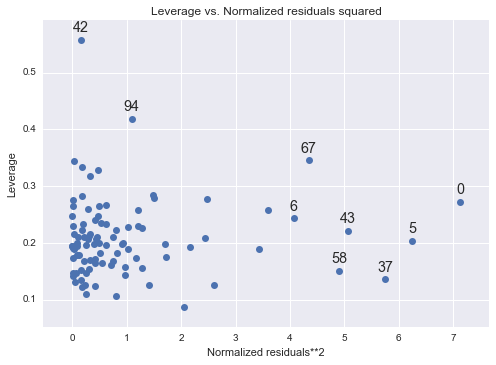

In [47]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

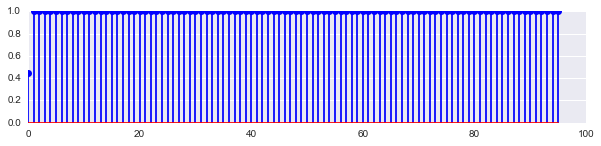

In [48]:
plt.figure(figsize=(10, 2))
plt.stem(result.outlier_test().ix[:, -1]) # 귀무가설: 이상치가 아니다
plt.show()

In [49]:
outliertest = result.outlier_test().ix[:,-1]
outliertest[outliertest<0.01]

Series([], Name: bonf(p), dtype: float64)

# ===============================================

# 3. StratifiedKFold 검정 실시

Backward 방식으로 진행한 Single Coefficient t-test, Loss-of-Fit test 결과 값으로 검증함

## 1) Backward 방식 StratifiedKFold 검정

In [50]:
y_bw = df_accident_bw.ix[:, -1] 
X_bw = df_accident_bw.ix[:, :-1]

In [51]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_bw, n_folds=10, shuffle = True, random_state=20)
cv

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
from sklearn.cross_validation import cross_val_score
score_bw = cross_val_score(model, X_bw, y_bw, cv = cv)
print score_bw

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[ 0.49982496  0.25737046  0.3695134   0.44602234  0.13653528 -0.44474717
 -0.13153433  0.28364715  0.46609772 -0.53764019]


In [54]:
np.mean(score_bw)

0.13450896228104756

# =============================================


## 2) Lasso 방식 StratifiedKFold 검정

In [55]:
y_la = df_accident_Lasso.ix[:, -1]
X_la = df_accident_Lasso.ix[:, :-1]

In [56]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_la, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
from sklearn.cross_validation import cross_val_score
score_lasso = cross_val_score(model, X_la, y_la, cv = cv)
print score_lasso

[ 0.59422166 -0.06954714 -0.22626181  0.35365946  0.17609956  0.29200521
 -0.16732629  0.05137902  0.28135839 -1.37322317]


In [59]:
np.mean(score_lasso)

-0.0087635117467051993

# =============================================

## 3) Random Forest 방식 StratifiedKFold 검정

In [60]:
y_RF = df_accident_RF.ix[:, -1]
X_RF = df_accident_RF.ix[:, :-1]

In [61]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y_RF, n_folds=10, shuffle = True, random_state=20)
cv

sklearn.cross_validation.StratifiedKFold(labels=[-2.87282112 -2.14408289 -1.02854671 -0.01091001  1.0446721   1.67140742
  1.41352698  0.5263674   0.44252711  0.55498545  0.93539354  0.45641216
 -1.27021026 -0.34864087  0.20520927  0.58381548  0.94609881  1.10296813
  1.66790966  0.49456956  2.22998938  1.91911255  0.99125174  1.01923383
 -1.28292939 -0.78870019 -0.39576981  0.36695425  0.66627787  0.33409649
  0.07801793  0.14797317  0.59038704  1.32767283  0.51809996 -0.61517486
 -1.4927951  -2.09479625 -1.21297415  0.18295078  0.30378255 -0.01419579
  0.06847858 -0.46890483  0.12709259  0.72033419  1.00768062  0.02078183
 -1.6454247  -0.7212042  -0.48162396  0.18623656  0.31014212  0.52795729
  0.23382732 -0.32581457  0.28152407 -0.16364561  0.74481852 -0.78688317
 -1.59772795 -2.13352147 -0.62471421 -0.1094833   0.43097389  0.47867065
 -0.6469727  -0.7423662  -0.42491782  0.24972624  0.25523786 -1.24477199
 -2.60889909 -2.11943957 -0.54839941 -0.25734323  0.38327714  0.59695859
  0

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [63]:
from sklearn.cross_validation import cross_val_score
score_RF = cross_val_score(model, X_RF, y_RF, cv = cv)
print score_RF

[ 0.63071536  0.17567496  0.05260325  0.42181029  0.53841503  0.19775073
  0.35545418  0.33245374  0.69119142 -1.12611215]


In [64]:
np.mean(score_RF)

0.22699568185675253

## * 마무리

1. 중간점검 당시와 다르게 y값을 **일 평균 교통사고량**으로 변경하면서 기존 X feature 항목에서 가장 영향력이 가장 높던 days항목을 없앴다. 가중치가 높던 Feature값 하나가 사라지니 다른 조합을 아무리 해보아도 모델의 성능이 좀처럼 좋아지지 않았다.
2. 일반적인 상식으로 가중치가 높을것 같다고 생각했던 X Feature들(유류량, 기후요인, 인구 등)이 생각보다 높지않은 가중치를 보였다.
3. 시간에 따라서 변하는 예측을 하려면 데이터들이 시계열성을 가질 가능성이 높다.